In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 读取数据

In [220]:
pvuv = pd.read_csv('./model_pv_uv_22-28.csv')
pvuv.sort_values(by='pv',ascending=False,inplace=True)
pvuv.head()

,model,pv,uv
325,PBAM00,538047969,603725
1971,PCHM10,351327116,379313
578,DUB-AL00,331336233,167417
654,OPPO A83,292713764,319587
4590,OPPO A57,266325616,283738


In [400]:
mobile = pd.read_csv('./mobile_new.csv')
mobile.head()

,alias_name,price,commented,screen_size,cost_efficient,performance,endurance,appearance,camera_performance,days,ba_cap,ram,rom
0,iPhone X2 Plus,0,4,NaN,0,0,0,0,0,809,0,0,0
1,10 Pro,4999,28,6.67,8,9,8,7,8,286,4500,8,256
2,11 pro max,9599,52,6.50,5,10,6,6,7,456,3969,4,64
3,1107,380,1,1.52,0,0,0,0,0,3986,800,0,0
4,11Pro,0,0,6.67,0,0,0,0,0,0,4500,0,0


In [403]:
union = pd.merge(pvuv,mobile,how='left',left_on='model',right_on='alias_name')
union.iloc[105:110,:]

,model,pv,uv,alias_name,price,commented,screen_size,cost_efficient,performance,endurance,appearance,camera_performance,days,ba_cap,ram,rom
105,V1818CT,40348384,58893,V1818CT,1998.0,18.0,6.20,8.0,8.0,9.0,9.0,8.0,699.0,4030.0,4.0,32.0
106,OPPO R9 Plusm A,39701637,40760,OPPO R9 Plusm A,1060.0,963.0,6.00,7.0,5.0,8.0,8.0,9.0,1735.0,4120.0,4.0,64.0
107,V1965A,39078909,59351,V1965A,1498.0,20.0,6.53,8.0,8.0,9.0,8.0,7.0,243.0,5000.0,8.0,128.0
108,PCKM80,38877871,48566,PCKM80,2299.0,82.0,6.40,9.0,8.0,10.0,9.0,10.0,579.0,4035.0,6.0,256.0
109,vivo X7,38596564,50764,vivo X7,1270.0,485.0,5.70,8.0,5.0,8.0,9.0,9.0,1591.0,4000.0,4.0,64.0


## 计算手机model的相关信息的分布

In [224]:
price_gb = union.query("price>0").groupby(['price'])['pv','uv'].sum()

d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [247]:
price_gb['pv_sum'] = price_gb['pv'].cumsum()
price_gb['pv_per']= round(100*price_gb['pv']/price_gb['pv'].sum(),2)
price_gb['pv_sum_per']= round(100*price_gb['pv_sum']/price_gb['pv'].sum(),2)
price_gb['uv_sum'] = price_gb['uv'].cumsum()
price_gb['uv_per']= round(100*price_gb['uv']/price_gb['uv'].sum(),2)
price_gb['uv_sum_per']= round(100*price_gb['uv_sum']/price_gb['uv'].sum(),2)
price_gb.reset_index(inplace=True)
price_gb.iloc[300:310,:]

,price,pv,uv,pv_sum,pv_per,pv_sum_per,uv_sum,uv_per,uv_sum_per
300,1799.0,79178980,97426,9210607024,0.53,61.95,9449912,0.59,57.26
301,1800.0,2291,5,9210609315,0.00,61.95,9449917,0.00,57.26
302,1809.0,56778,12,9210666093,0.00,61.95,9449929,0.00,57.26
303,1836.0,4545475,3864,9215211568,0.03,61.98,9453793,0.02,57.28
304,1849.0,9420519,16162,9224632087,0.06,62.05,9469955,0.10,57.38
305,1858.0,414404,370,9225046491,0.00,62.05,9470325,0.00,57.38
306,1859.0,416712,442,9225463203,0.00,62.05,9470767,0.00,57.39
307,1861.0,1053972,1168,9226517175,0.01,62.06,9471935,0.01,57.39
308,1880.0,162,1,9226517337,0.00,62.06,9471936,0.00,57.39
309,1898.0,11678597,20816,9238195934,0.08,62.14,9492752,0.13,57.52


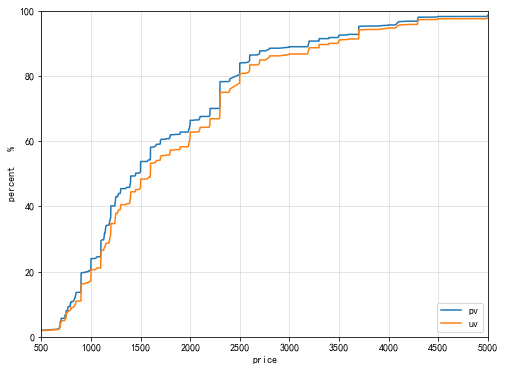

In [305]:
plt.figure(figsize=(8,6))
plt.xlabel('price')
plt.ylabel('percent   %')
plt.xlim(500,5000)
plt.ylim(0,100)
plt.plot(price_gb['price'],price_gb['pv_sum_per'],label='pv')
plt.plot(price_gb['price'],price_gb['uv_sum_per'],label='uv')
plt.legend(loc=4)
#　设置网格线
plt.grid(alpha=0.4)

### 分桶---分组

In [227]:
price =union.query('price>0')
price

,model,pv,uv,alias_name,price,commented,screen_size,cost_efficient,performance,endurance,appearance,camera_performance,days,ba_cap,ram,rom
0,PBAM00,538047969,603725,PBAM00,899.0,438.0,6.20,8.0,7.0,9.0,9.0,9.0,879.0,4230.0,4.0,64.0
1,PCHM10,351327116,379313,PCHM10,1099.0,79.0,6.50,9.0,9.0,10.0,9.0,9.0,426.0,5000.0,4.0,128.0
2,DUB-AL00,331336233,167417,DUB-AL00,1149.0,24.0,6.50,8.0,7.0,8.0,8.0,7.0,730.0,4000.0,4.0,64.0
3,OPPO A83,292713764,319587,OPPO A83,1199.0,41.0,5.70,6.0,6.0,6.0,6.0,6.0,1067.0,3180.0,4.0,32.0
4,OPPO A57,266325616,283738,OPPO A57,400.0,585.0,5.20,7.0,3.0,7.0,8.0,9.0,1490.0,2900.0,3.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6204,L13,6,1,L13,599.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,3165.0,1500.0,0.0,0.0
6208,i628,6,1,i628,712.0,1.0,2.00,0.0,0.0,0.0,0.0,0.0,4596.0,700.0,0.0,0.0
6215,Lenovo K80M,5,1,Lenovo K80M,1299.0,32.0,5.50,5.0,5.0,5.0,5.0,5.0,2040.0,4000.0,4.0,64.0
6218,Neolix 1-C-T,4,1,Neolix 1-C-T,3399.0,20.0,6.55,9.0,9.0,9.0,9.0,9.0,42.0,4500.0,8.0,128.0


In [249]:
bins = [x*500 for x in range(11)]
bins.append(100000)
price_bin =price[['pv','uv']].groupby(pd.cut(price['price'],bins =bins)).sum()
price_bin.reset_index(inplace=True)
price_bin
# price_df = pd.DataFrame(price_bin,columns=['pv','uv'])
# price_df.reset_index(inplace=True)
# price_df

,price,pv,uv
0,"(0, 500]",303490288,322307
1,"(500, 1000]",3262795794,3073774
2,"(1000, 1500]",4423622124,4584339
3,"(1500, 2000]",1879087234,2375007
4,"(2000, 2500]",2607087037,2952263
5,"(2500, 3000]",746131808,1003971
6,"(3000, 3500]",524528106,703209
7,"(3500, 4000]",469046351,614636
8,"(4000, 4500]",383225929,461360
9,"(4500, 5000]",71961742,118303


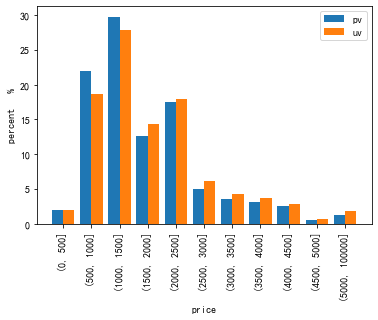

In [250]:
# ax = plt.gca() #获取当前的坐标轴
width  =0.4
price_index = [str(x) for x in price_bin['price'].tolist()]
pv_index = np.arange(11)
uv_index = pv_index+width
plt.xlabel('price')
plt.ylabel('percent   %')
plt.bar(pv_index, height=100*price_bin['pv']/price_bin['pv'].sum(),width=width, label='pv')
plt.bar(uv_index, height=100*price_bin['uv']/price_bin['uv'].sum(),width=width, label='uv')
plt.xticks(x_index + width/2,labels=price_index,rotation=90)
plt.legend()

# sns.barplot([str(x) for x in price_df['price'].tolist()],price_df['pv'],)
# sns.barplot([str(x) for x in price_df['price'].tolist()],price_df['uv'],)

In [425]:
def column_analy(column,union,xlimleft,xlimright,bins,):
    #计算累计百分比
    column_df = union[union[column]>0]
    column_gb = column_df.groupby([column,])['pv','uv'].sum()
    column_gb['pv_sum'] = column_gb['pv'].cumsum()
    column_gb['pv_per']= round(100*column_gb['pv']/column_gb['pv'].sum(),2)
    column_gb['pv_sum_per']= round(100*column_gb['pv_sum']/column_gb['pv'].sum(),2)
    column_gb['uv_sum'] = column_gb['uv'].cumsum()
    column_gb['uv_per']= round(100*column_gb['uv']/column_gb['uv'].sum(),2)
    column_gb['uv_sum_per']= round(100*column_gb['uv_sum']/column_gb['uv'].sum(),2)
    column_gb.reset_index(inplace=True)
#     print(column_gb.iloc[200:210,:])
    
    # 分桶计算
    column_bin =column_df[['pv','uv']].groupby(pd.cut(column_df[column],bins =bins)).sum()
    column_bin.reset_index(inplace=True)
#     print(column_bin.head())
    
    # 画百分比累计图
    
    plt.figure(figsize=(12,6))
    ax = plt.subplot(1, 2, 1)
    # 设置x、y轴名称、字体大小
    ax.set_xlabel(..., fontsize=20)
    ax.set_ylabel(..., fontsize=20)
    plt.xlabel(column)
    plt.ylabel('percent   %')
    # 设置x、y轴刻度名称字体大小
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    # 设置x、y轴范围
    plt.xlim(xlimleft,xlimright)
    plt.ylim(0,100)
    plt.plot(column_gb[column],column_gb['pv_sum_per'],label='pv')
    plt.plot(column_gb[column],column_gb['uv_sum_per'],label='uv')
    #　设置网格线
    plt.title(f'{column}--百分比累计图',fontsize=20)
    plt.grid(alpha=0.4)
    plt.legend()
    
    # 
    width  =0.4
    column_index = [str(x) for x in column_bin[column].tolist()]
    pv_index = np.arange(len(bins)-1)
    uv_index = pv_index+width
    ax2 = plt.subplot(1, 2, 2)
    ax2.set_xlabel(..., fontsize=20)
    ax2.set_ylabel(..., fontsize=20)
    plt.xlabel(column)
    plt.ylabel('percent   %')
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
#     print(pv_index)
#     print(100*column_bin['pv']/column_bin['pv'].sum())
    plt.bar(pv_index, height=np.array(100*column_bin['pv']/column_bin['pv'].sum()),width=width, label='pv')
    plt.bar(uv_index, height=np.array(100*column_bin['uv']/column_bin['uv'].sum()),width=width, label='uv')
    # 设置x轴刻度名称旋转角度
    plt.xticks(pv_index + width/2,labels=column_index,rotation=45)
    plt.title(f'{column}--分桶分布图',fontsize=20)
    plt.legend(fontsize=10)
    
    plt.savefig(f'./{column}.jpg')
    
    return column_gb

d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


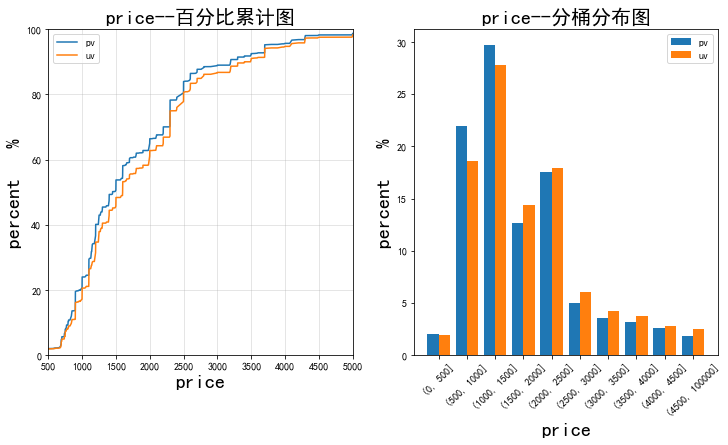

In [426]:
price_bins = [x*500 for x in range(10)]
price_bins.append(100000)
price_analy= column_analy('price',union,500,5000,price_bins)

In [464]:
price_analy[price_analy['pv_sum_per']>20]['price'].tolist()[0]

970.0

In [465]:
for threshold in np.linspace(0,100,6):
    if threshold>=100:break;
    print("阈值：",threshold,end='\t')
    print(price_analy[price_analy['pv_sum_per']>threshold]['price'].tolist()[0],end='\t')
    print(price_analy[price_analy['uv_sum_per']>threshold]['price'].tolist()[0])
    threshold_list.append(threshold)

阈值： 0.0	149.0	149.0
阈值： 20.0	970.0	1000.0
阈值： 40.0	1200.0	1299.0
阈值： 60.0	1699.0	1998.0
阈值： 80.0	2498.0	2499.0


In [504]:
def column_threshold(column,column_analy,dims):
    for threshold in np.linspace(0,100,dims+1):
        if threshold>=100:break;
        print("阈值：%.2f"%threshold,end='\t')
        print(column_analy[column_analy['pv_sum_per']>threshold][column].tolist()[0],end='\t')
        print(column_analy[column_analy['uv_sum_per']>threshold][column].tolist()[0])
        threshold_list.append(threshold)

In [505]:
column_threshold('price',price_analy,5)

阈值：0.00	149.0	149.0
阈值：20.00	970.0	1000.0
阈值：40.00	1200.0	1299.0
阈值：60.00	1699.0	1998.0
阈值：80.00	2498.0	2499.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


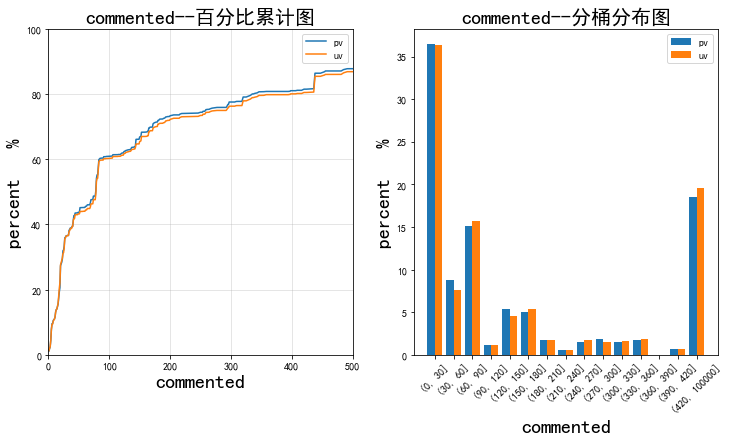

In [513]:
commented_bins = [x*30 for x in range(15)]
commented_bins.append(100000)
commented_analy= column_analy('commented',union,0,500,commented_bins)

In [512]:
column_threshold('commented',commented_analy,3)

阈值：0.00	1.0	1.0
阈值：33.33	27.0	27.0
阈值：66.67	150.0	153.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


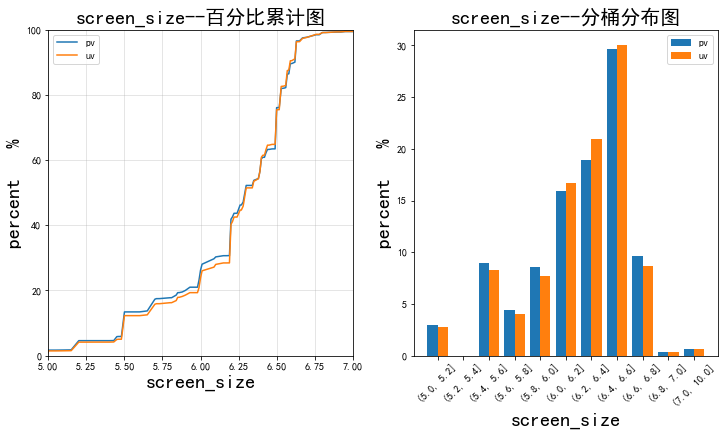

In [428]:
screen_size_bins = [5+x*0.2 for x in range(11)]
screen_size_bins.append(10)
screen_size_analy= column_analy('screen_size',union,5,7,screen_size_bins)

In [522]:
column_threshold('screen_size',screen_size_analy,2)

阈值：0.00	2.31	2.31
阈值：50.00	6.3	6.3


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


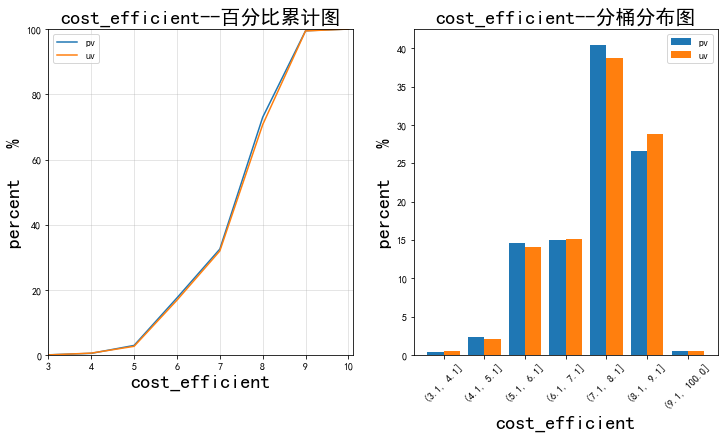

In [429]:
cost_efficient_bins = [3.1+x for x in range(7)]
cost_efficient_bins.append(100)
cost_efficient_analy= column_analy('cost_efficient',union,3,10.1,cost_efficient_bins)

In [524]:
column_threshold('cost_efficient',cost_efficient_analy,3)

阈值：0.00	2.0	2.0
阈值：33.33	8.0	8.0
阈值：66.67	8.0	8.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


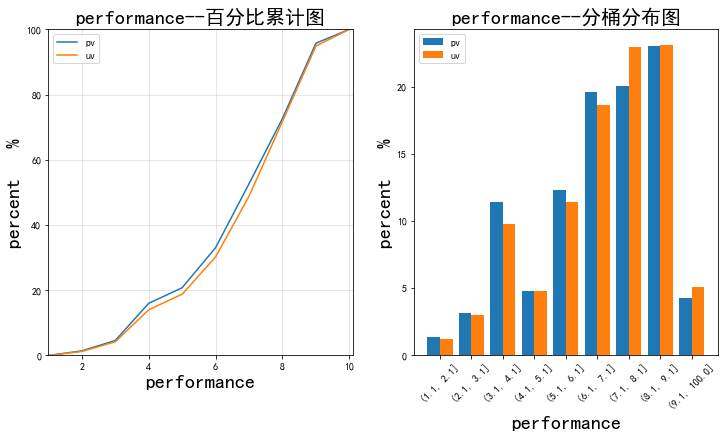

In [430]:
performance_bins = [1.1+x for x in range(9)]
performance_bins.append(100)
performance_analy= column_analy('performance',union,1,10.1,performance_bins)

In [525]:
column_threshold('performance',performance_analy,3)

阈值：0.00	2.0	2.0
阈值：33.33	7.0	7.0
阈值：66.67	8.0	8.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


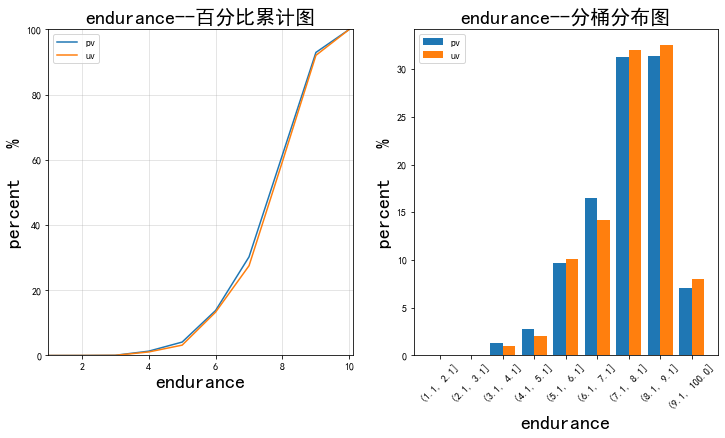

In [526]:
endurance_bins = [1.1+x for x in range(9)]
endurance_bins.append(100)
endurance_analy= column_analy('endurance',union,1,10.1,endurance_bins)

In [529]:
column_threshold('endurance',endurance_analy,3)

阈值：0.00	2.0	2.0
阈值：33.33	8.0	8.0
阈值：66.67	9.0	9.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


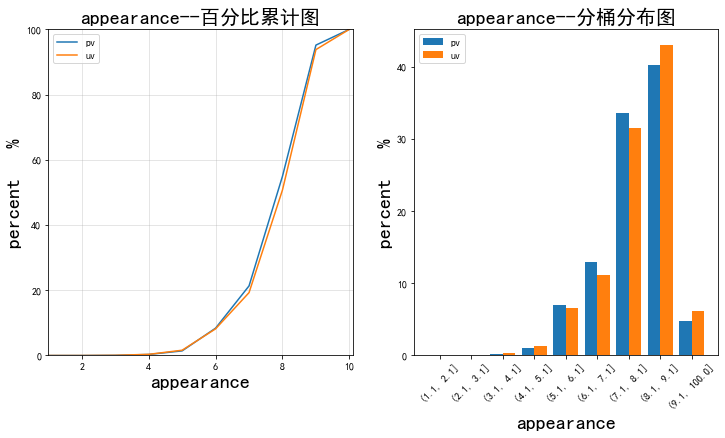

In [527]:
appearance_bins = [1.1+x for x in range(9)]
appearance_bins.append(100)
appearance_analy= column_analy('appearance',union,1,10.1,appearance_bins)

In [530]:
column_threshold('appearance',appearance_analy,3)

阈值：0.00	3.0	3.0
阈值：33.33	8.0	8.0
阈值：66.67	9.0	9.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


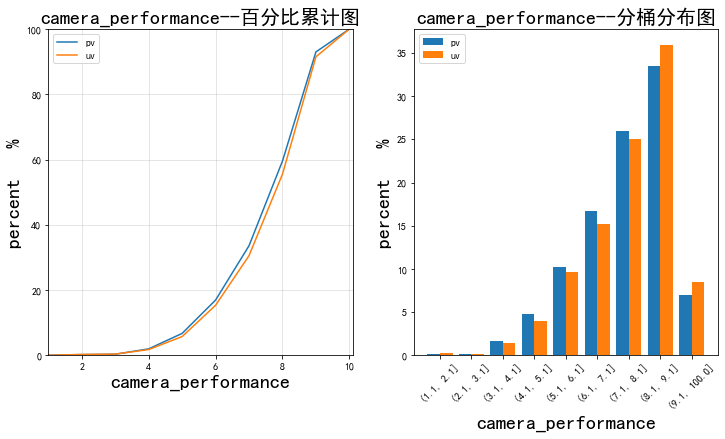

In [528]:
camera_performance_bins = [1.1+x for x in range(9)]
camera_performance_bins.append(100)
camera_performance_analy= column_analy('camera_performance',union,1,10.1,camera_performance_bins)

In [531]:
column_threshold('camera_performance',camera_performance_analy,3)

阈值：0.00	2.0	2.0
阈值：33.33	7.0	8.0
阈值：66.67	9.0	9.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


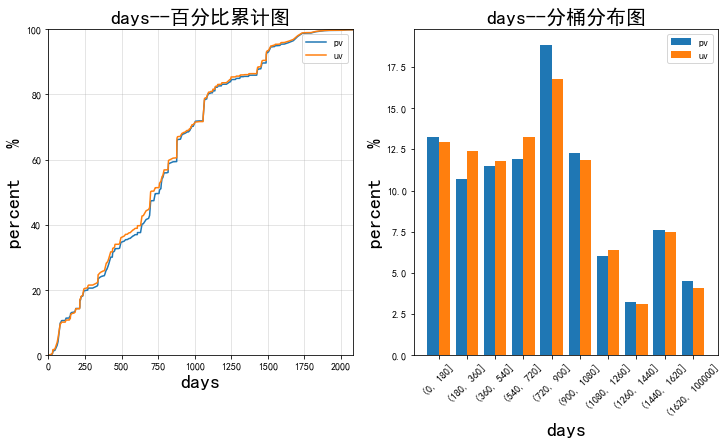

In [431]:
days_bins = [x*180 for x in range(10)]
days_bins.append(100000)
days_analy= column_analy('days',union,0,2080.1,days_bins)

In [517]:
column_threshold('days',days_analy,4)

阈值：0.00	1.0	4.0
阈值：25.00	395.0	354.0
阈值：50.00	760.0	699.0
阈值：75.00	1064.0	1064.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


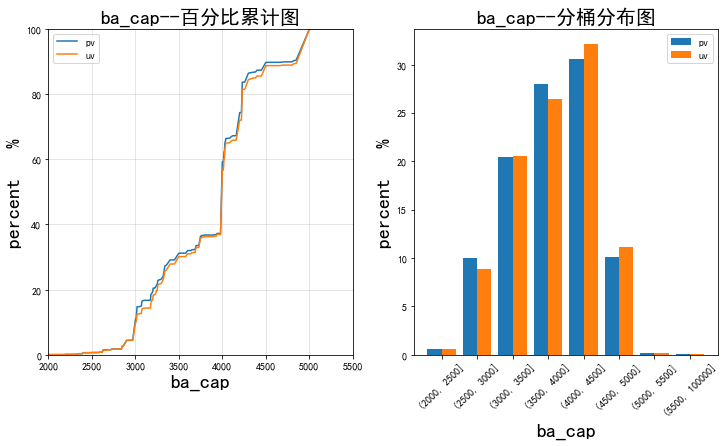

In [432]:
ba_cap_bins = [2000+x*500 for x in range(8)]
ba_cap_bins.append(100000)
ba_cap_analy= column_analy('ba_cap',union,2000,5500,ba_cap_bins)

In [518]:
column_threshold('ba_cap',ba_cap_analy,3)

阈值：0.00	1400.0	1350.0
阈值：33.33	3700.0	3750.0
阈值：66.67	4100.0	4200.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


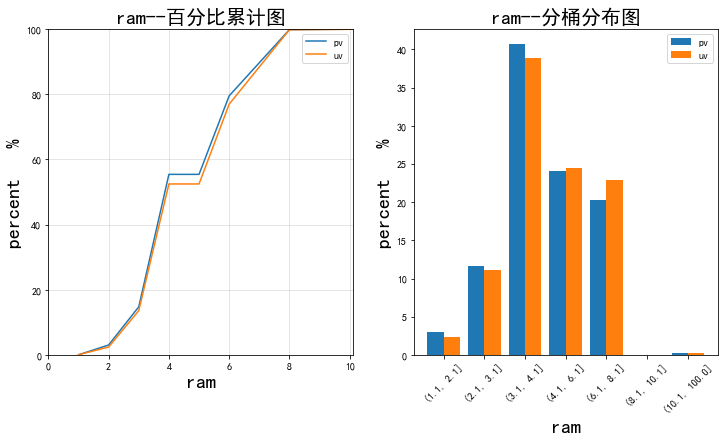

In [433]:
ram_bins = [1.1,2.1,3.1,4.1,6.1,8.1,10.1]
ram_bins.append(100)
ram_analy= column_analy('ram',union,0,10.1,ram_bins)

In [519]:
column_threshold('ram',ram_analy,3)

阈值：0.00	1.0	1.0
阈值：33.33	4.0	4.0
阈值：66.67	6.0	6.0


d:\soft\anaconda3\envs\aicode\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,rom,pv,uv,pv_sum,pv_per,pv_sum_per,uv_sum,uv_per,uv_sum_per
0,2.0,9398,22,9398,0.00,0.00,22,0.00,0.00
1,4.0,191690,205,201088,0.00,0.00,227,0.00,0.00
2,5.0,1501,2,202589,0.00,0.00,229,0.00,0.00
3,8.0,9634226,10432,9836815,0.06,0.06,10661,0.06,0.06
4,16.0,369632591,380436,379469406,2.30,2.36,391097,2.11,2.17


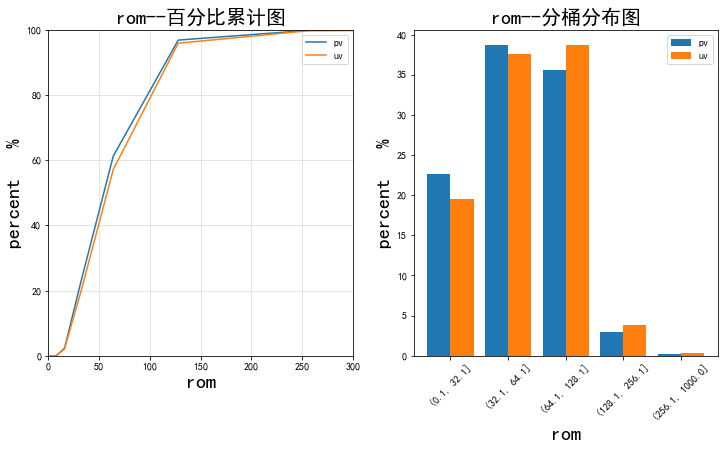

In [434]:
rom_bins = [0.1,32.1,64.1,128.1,256.1]
rom_bins.append(1000)
rom_analy= column_analy('rom',union,0,300,rom_bins)
rom_analy.head()

In [520]:
column_threshold('rom',rom_analy,3)

阈值：0.00	8.0	8.0
阈值：33.33	64.0	64.0
阈值：66.67	128.0	128.0
